## Example 1-1: Instance-Based Versus Model-Based Learning
For this example, we are going to create a model that calculates a prediction for the life satisfaction of Cyprus, based on their GDP per capita, which is $22,587. We are going to use two generalizing approaches: Instance-based vs model-based learning.

### Model-based learning w/ linear regression
For the first approach of this problem, we are goin the use model-based learning. We will create a model that will detect patterns on the train data and construct a predictive model using linear regression.

In the function bellow, we are going to:
1. Filter the oecd_bli dataset, leaving just the lines where the column "INEQUALITY" is equal to "TOT" (This removes any data that includes inequalities or subcategories);
2. We are also going to reshape the OECD data using the pivot method. It sets "Country" as the row index, the values in the "Indicator" column as new columns, and the corresponding "Value" as the values for these new columns. This transforms the data into a format where each row represents a country, and each column represents an indicator (e.g., life satisfaction).
3. On the in the GDP dataset, we are going to rename the column that corresponds to the year 2015 to "GDP per capita" and sets the "Country" column as the index, so it can be aligned with the OECD data for merging.
4. Merge the two datasets using the country names as the index. This combines the life satisfaction data from the OECD and the GDP per capita data from the IMF into a single dataset.
5. Sort the merged dataset by GDP per capita in ascending order, so countries with lower GDP per capita appear first.
6. Remove certain countries from the dataset (why?)


In [28]:
# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


In [29]:
import os
datapath = os.path.join("datasets", "life_sat", "")


The function above (os.path.join()) combines different components of a file or directory path. The result of this code is a path pointing to the "datasets\life_sat\" on Windows. The empty string at the end ensures that the path ends with a directory separator.

In [30]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [31]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

1. *DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/":*

Defines the root URL (the base address) of the repository from which the files will be downloaded. In this case, the files are hosted on the handson-ml2 GitHub repository.

2. *os.makedirs(datapath, exist_ok=True):*

Creates the datapath directory (which was built earlier with os.path.join("datasets", "life_sat", "")) if it doesn't already exist. This ensures that the directory where the files will be saved is available.
The argument exist_ok=True prevents an error if the directory already exists.

3. *for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):*

A for loop iterating over a tuple containing two filenames: "oecd_bli_2015.csv" and "gdp_per_capita.csv". For each iteration, the variable filename stores one of the filenames.


4. *url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename:*

Constructs the full URL for each file. It concatenates the base URL (DOWNLOAD_ROOT) with the folder path in the repository ("datasets/lifesat/") and the file name (filename).
Example of a full URL generated: "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv".

5. *urllib.request.urlretrieve(url, datapath + filename):*

Downloads the file from the constructed URL and saves it in the local datapath directory with the specified filename.
The urlretrieve function takes two main parameters: the URL of the file and the local path where the file will be saved.
For example, the file "oecd_bli_2015.csv" will be downloaded from the constructed URL and saved locally as datasets/life_sat/oecd_bli_2015.csv.

*In summary, this code:
Creates the datasets/life_sat directory (if it doesn’t already exist).
Downloads the files oecd_bli_2015.csv and gdp_per_capita.csv from a GitHub repository.
Saves those files in the local directory datasets/life_sat/.*


In [32]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) # country_stats is the new dataframe
X = np.c_[country_stats["GDP per capita"]] # feature matrix
y = np.c_[country_stats["Life satisfaction"]] # target matrix

# Display the DataFrame (in Jupyter, just calling the variable outputs the DataFrame)
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


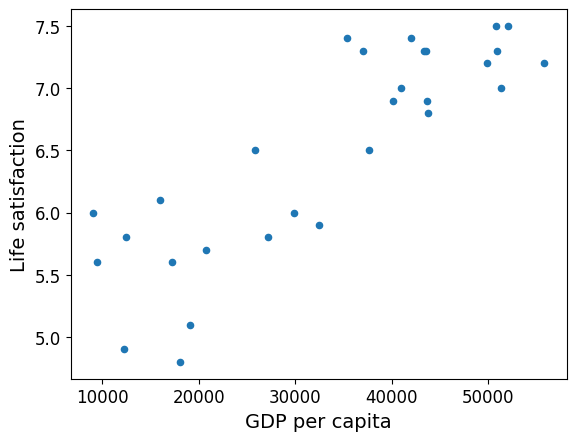

[[5.96242338]]


In [33]:


# Visualize the data in a scatter plot (uses dots to represent values for two different numeric variables)
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression() # Creates an instance of the linear regression model from the scikit-learn library

# Train the model
model.fit(X, y) # Trains (or fits) the linear regression model using the GDP per capita (X) as the input and life satisfaction (y) as the target.

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

*P.S.*:
1. Why do we need to explicitly specify the GDP per capita for Cyprus (*X_new = [[22587]]*) in the code?

Because we are making predictions for countries outside the training data: The model is trained on the filtered dataset. However, the task here is to make a prediction for Cyprus.

2. Why this model is a model-based learning using linear regression?

Model-based learning refers to an approach where the algorithm builds a model based on the patterns it identifies in the training data. The model then uses these learned patterns to make predictions on new data. The linear regression model tries to find the best-fitting line that represents the relationship between the independent variable (GDP per capita) and the dependent variable (life satisfaction).
Once trained, the model stores this learned relationship (in the form of a mathematical equation) and can use it to make predictions for new data, like predicting Cyprus' life satisfaction based on its GDP per capita.

3. Does a linear regression problem necessarily need to have one variable (feature) and another as the target?

Only if it is a simple Linear Regression, such as the one we have here. It involves only one independent variable and one dependent variable. For example, predicting life satisfaction (target) based on GDP per capita (feature).

Feature: GDP per capita
Target: Life satisfaction

In a case of multiple Linear Regression, we have multiple independent variables (features) to predict a single dependent variable. For example, predicting life satisfaction based on GDP per capita, life expectancy, education level, etc:

Features: GDP per capita, life expectancy, education level, etc.
Target: Life satisfaction.

### Instance-Based learning w/ k-Nearest Neighbors regression (KNN)
For this second approach, our model will compare new points with points in our dataset. The measure that our model will use is called k-Nearest Neighbors (in this example, k = 3).
To make this model an Instance-based learning model, we just need to replace the Linear Regression model with k-Nearest Neighbors regression. In order to do this, we just need to replace two lines in our previous code.

In [34]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


*P.S.:*
1. Why KNN is an instance-based model algorithm?

KNN is an instance-based learning algorithm, meaning it doesn’t create a general model during training. Instead, it memorizes the training instances (data points) and uses them directly for making predictions.
When you call *model1.fit(X, y)*, the KNN algorithm stores the features (GDP per capita) and corresponding targets (life satisfaction) for all the training instances. The default distance metric is typically Euclidean distance, but this can be changed if needed.
When you call model1.predict(X_new), KNN performs the following steps:
- Calculate Distance: It calculates the distance from the new data point (Cyprus’ GDP per capita, X_new = [[22587]]) to all the points in the training dataset.
- Find Neighbors: It identifies the k (in this case, 3) closest points (neighbors) to Cyprus based on the calculated distances.
- Average the Targets: It then averages the life satisfaction values of these 3 nearest neighbors to make the prediction for Cyprus.

## Finding Out Which Countries are Selected:

In [36]:
import sklearn.neighbors

# Assuming country_stats contains the original data with country names
countries = country_stats.index.tolist()  # Get the list of countries

# Create and train the KNN model
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model1.fit(X, y)

# Find the neighbors for Cyprus
distances, indices = model1.kneighbors(X_new)

# Output the distances and the corresponding countries
for distance, index in zip(distances[0], indices[0]):
    print(f"Country: {countries[index]}, Distance: {distance}")


Country: Slovenia, Distance: 1854.518
Country: Spain, Distance: 3277.7210000000014
Country: Portugal, Distance: 3465.4079999999994
